In [1]:
import os
os.chdir('..')

from auditory_brain_dnn.aud_dnn.utils import get_target
os.chdir('../..')
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
all_results = []
for f in glob.glob('auditory_brain_dnn/results/mel256-ec-base-step-*/*/df_output.pkl'):
    if 'comp' in f:
        f_parts = f.split('/')
        step = int(f_parts[-3].split('-')[-1])
        layer = int(f_parts[-2].split(f_parts[-3])[-1].split('_')[0][1:])
        df = pd.read_pickle(f)
        df['layer'] = layer
        df['step'] = step
        all_results.append(df)

df_all = pd.concat(all_results)

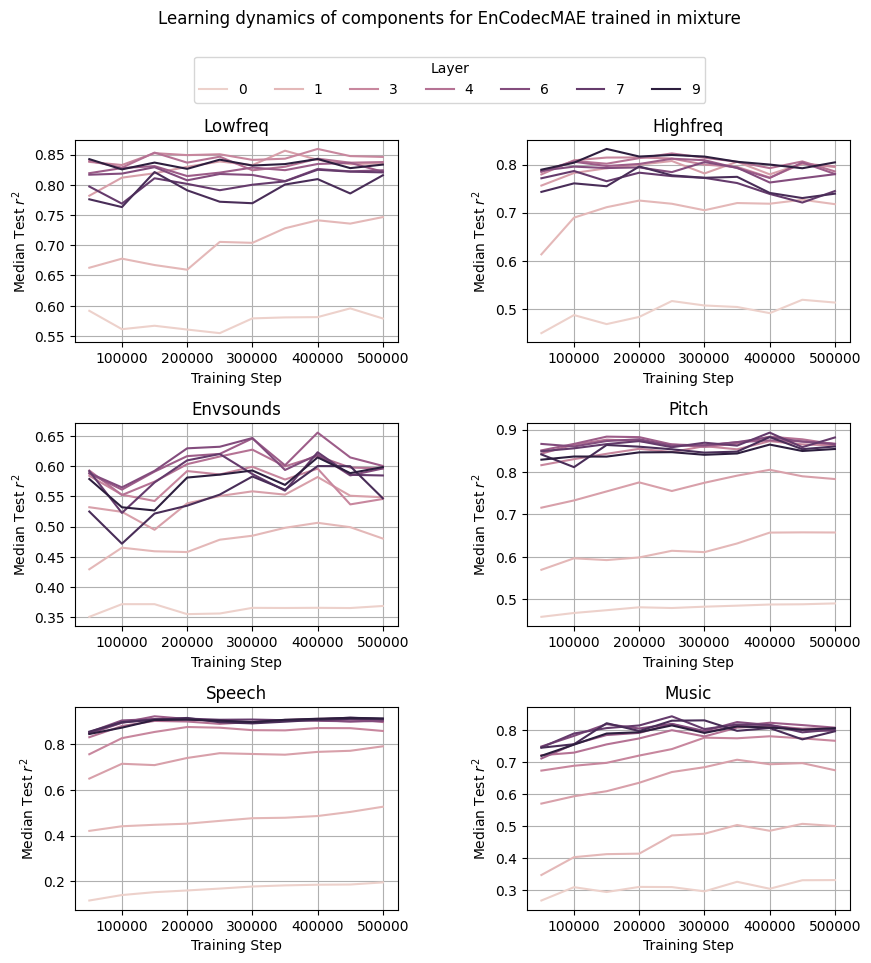

In [39]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
fig.suptitle('Learning dynamics of components for EnCodecMAE trained in mixture',y=1.01)

for i, comp in enumerate(df_all['comp'].unique()):
    sns.lineplot(data=df_all.loc[(df_all['comp']==comp)],
                 x='step',
                 y='median_r2_test',
                 hue='layer',
                 ax=ax[i // 2, i % 2],
                 legend=True)
    ax[i // 2, i % 2].set_title(comp.capitalize())
    
# Collect handles and labels for the legend from one of the plots
handles, labels = ax[0, 0].get_legend_handles_labels()

# Check if labels are present
if labels:
    # Add a single legend to the figure
    fig.legend(handles, labels, loc='upper center', ncol=max(len(labels), 1), bbox_to_anchor=(0.5, 0.97), title='Layer')
else:
    print("No labels found for the legend")

# Set the same y-axis limits for all axes
ylim = (df_all['median_r2_test'].min()-0.1, df_all['median_r2_test'].max()+0.1)

for axes in ax.flat:
    axes.grid('on')
    axes.get_legend().remove()
    axes.set_xlabel('Training Step')
    axes.set_ylabel('Median Test $r^2$')

# Adjust layout to make space for the legend and prevent overlapping
plt.subplots_adjust(top=0.88, hspace=0.4, wspace=0.4)

# Display the plot
plt.show()